Αρχικά επειδή τα εργαλεία που θα χρησιμοποιήσουμε ειναι case sensitive θα μετατρέψουμε το training set μας σε lowercase

In [ ]:
with open('../twitter_data/train2017.tsv', 'r', encoding="utf8") as fileInput:
#with open('test.tsv', 'r', encoding="utf8") as fileInput:
    text = ''
    for line in fileInput:
        line = line.lower()
        text += line
    #print(text)


Aφαίρεση των URL

In [ ]:
import re
text = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', ' ! ', text)
text = text.replace('can\'t',' cant ')
text = text.replace(' u ', ' you ')

Σπάσιμο κειμένου σε tweet για να επεξεργαστούμε το καθένα ξεχωριστά

In [ ]:
tweetList = text.splitlines()
#print(tweetList)

Σπάσιμο tweet σε λέξεις

In [ ]:
from nltk import word_tokenize
tokenedTweetList = []
for tweet in tweetList:
    tokenedTweetList.append(word_tokenize(tweet))
#print(tokenedTweetList)

Αφαίρεση των tags

In [ ]:
for tweet in tokenedTweetList:
    for word in tweet:
        if word == '@':
            tweet.remove(tweet[tweet.index(word)+1])
            tweet.remove(tweet[tweet.index(word)])
#print(tokenedTweetList)

Καθάρισμα σημείων στήξεως

In [ ]:
from string import punctuation
clearedTweetList = []
for tweet in tokenedTweetList:
    for word in tweet:
        tokenedTweetList[tokenedTweetList.index(tweet)][tweet.index(word)] = word.strip(punctuation)
#print(tokenedTweetList)


Καθάρισμα απο stopwords και κενα tokens

In [ ]:
from nltk.corpus import stopwords

cleanedTweetList = []

for tweet in tokenedTweetList:
    cleanedTweet = []
    for word in tweet:
        if word not in stopwords.words('english') and word != '':
            cleanedTweet.append(word);
    cleanedTweetList.append(cleanedTweet)
#print(cleanedTweetList)

In [ ]:
file = open('filteredTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    for word in tweet:
        file.write(word + ' ')
    file.write('\n')
file.close()

Θα διαχωρήσουμε τα positive/negative/neutral tweets σε διαφορετικά αρχεία για μα διευκολήνουμε την επεξεργασία τους

In [ ]:
file = open('positiveTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'positive':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('negativeTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'negative':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('neutralTweets.tsv', 'w', encoding="utf8")

for tweet in cleanedTweetList:
    if tweet[2] == 'neutral':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()


Lemmatized εκδοσεις των παραπάνων αρχείων που θα χρησιμοποιηθούν για ακριβέστερα αποτελέσματα στα dataframes/WordClouds

In [ ]:

from nltk.stem import  WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_output = []
for tweet in cleanedTweetList:
    lemmatized_output.append([lemmatizer.lemmatize(word) for word in tweet])


file = open('lemmatizedPositiveTweets.tsv', 'w', encoding="utf8")

for tweet in lemmatized_output:
    if tweet[2] == 'positive':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('lemmatizedNegativeTweets.tsv', 'w', encoding="utf8")

for tweet in lemmatized_output:
    if tweet[2] == 'negative':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('lemmatizedNeutralTweets.tsv', 'w', encoding="utf8")

for tweet in lemmatized_output:
    if tweet[2] == 'neutral':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

 Οι 50 πιο συχνά χρησιμοποιημένες λέξεις στα θετικά tweets

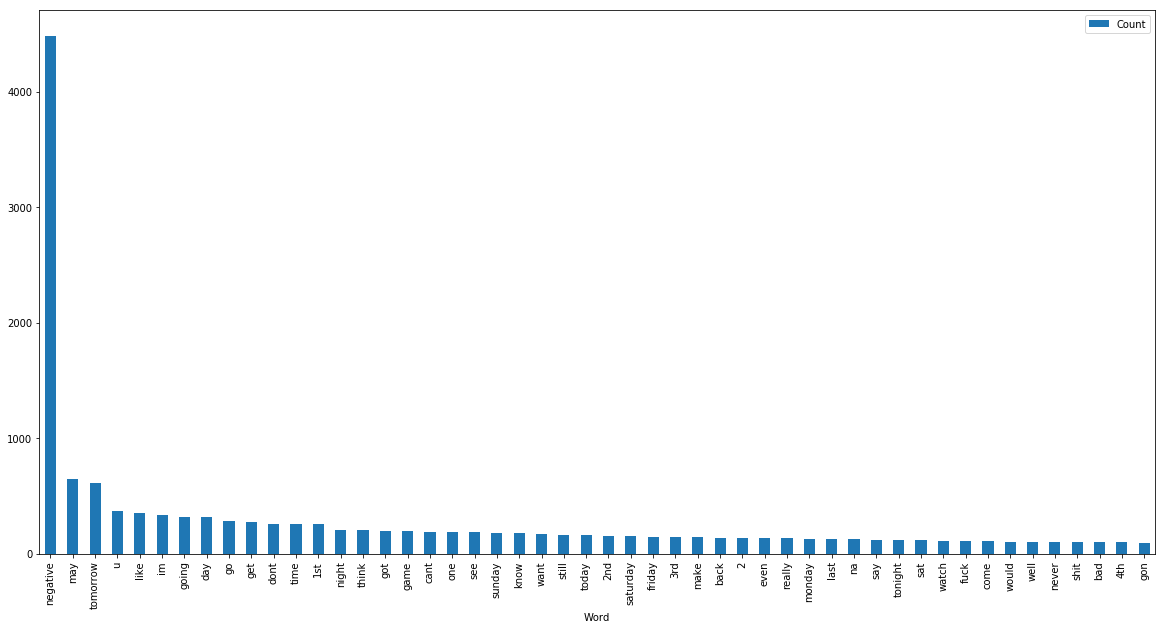

In [20]:
from collections import Counter
import pandas as pd 
from nltk import word_tokenize

with open('scripts/out/train2017_negative.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

positiveTweetList = []
for tweet in tweetList:
    positiveTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in positiveTweetList:
    count +=  Counter(tweet)
    
dataFrame = pd.DataFrame(data =count.most_common(50), columns=['Word', 'Count'])


Για την δημιουργία του Word Cloud θα χρησιμοποιησουμε το παρακάτω πακέτο(https://anaconda.org/conda-forge/wordcloud)

Oι 50 πιο συχνά χρησιμοποιημένες λέξεις για τα αρνητικά tweets

In [ ]:
from collections import Counter

with open('lemmatizedNegativeTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

negativeTweetList = []
for tweet in tweetList:
    negativeTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in negativeTweetList:
    count +=  Counter(tweet)
    
dataFrame = pd.DataFrame(data =count.most_common(50), columns=['Word', 'Count'])
dataFrame

Οι 50 πιο συχνά χρησιμοποιημένες λέξεις για τα ουδέτερα tweets

In [ ]:
from collections import Counter

with open('lemmatizedNeutralTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

neutralTweetList = []
for tweet in tweetList:
    neutralTweetList.append(word_tokenize(tweet))

count = Counter(' ')
for tweet in neutralTweetList:
    count +=  Counter(tweet)

dataFrame = pd.DataFrame(data =count.most_common(50), columns=['Word', 'Count'])
dataFrame

    Positive Tweets Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk import word_tokenize

positiveText = ''
for tweet in positiveTweetList:
    for word in tweet:
        positiveText = positiveText + word + ' '

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 14).generate(positiveText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

    Negative Tweets Word Cloud

In [ ]:
negativeText = ''
for tweet in negativeTweetList:
    for word in tweet:
        negativeText = negativeText + word + ' '

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 14).generate(negativeText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

    Neutral Tweets Word Cloud

In [ ]:
neutralText = ''
for tweet in neutralTweetList:
    for word in tweet:
        neutralText = neutralText + word + ' '

wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 14).generate(neutralText)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Stemmed εκδοση των positive/negative/neutral files 

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmedTweetList = []
for tokens in cleanedTweetList:
    stemmedTweetList.append([stemmer.stem(token) for token in tokens ])
    
file = open('stemmedPositiveTweets.tsv', 'w', encoding="utf8")

for tweet in stemmedTweetList:
    if tweet[2] == 'posit':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('stemmedNegativeTweets.tsv', 'w', encoding="utf8")

for tweet in stemmedTweetList:
    if tweet[2] == 'neg':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()

file = open('stemmedNeutralTweets.tsv', 'w', encoding="utf8")

for tweet in stemmedTweetList:
    if tweet[2] == 'neutral':
        for word in tweet[3:]:
            file.write(word + ' ')
        file.write('\n')
file.close()


Δημιουργία Bag-of-word και αποθήκευση σε csv ή pickle

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

with open('lemmatizedNeutralTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

'''
max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
max_df = 25 means "ignore terms that appear in more than 25 documents".
The default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". Thus, the default setting does not ignore any terms
min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
min_df = 5 means "ignore terms that appear in less than 5 documents"
The default min_df is 1, which means "ignore terms that appear in less than 1 document". Thus, the default setting does not ignore any terms.
'''

vectorizer = CountVectorizer(max_features = 200,stop_words='english',max_df=0.5,min_df=0.01)

vectorizedTweetList = vectorizer.fit_transform(tweetList)
print(vectorizer.get_feature_names())

#df = pd.DataFrame(data = vectorizedTweetList.toarray(), columns = vectorizer.get_feature_names())
#df.to_csv('neutralBagOfWords.csv',index=False)

pickle_out = open('neutralBagOfWords.pickle','wb')
pickle.dump(vectorizedTweetList.toarray(), pickle_out)


In [ ]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

with open('lemmatizedNegativeTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 200,stop_words='english',max_df=0.5,min_df=0.01)

vectorizedTweetList = vectorizer.fit_transform(tweetList)
print(vectorizer.get_feature_names())


#df = pd.DataFrame(data = vectorizedTweetList.toarray(), columns = vectorizer.get_feature_names())
#df.to_csv('negativeBagOfWords.csv',index=False)

pickle_out = open('negativeBagOfWords.pickle','wb')
pickle.dump(vectorizedTweetList.toarray(), pickle_out)

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

with open('lemmatizedPositiveTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()


vectorizer = CountVectorizer(max_features = 200,stop_words='english',max_df=0.5,min_df=0.01)

vectorizedTweetList = vectorizer.fit_transform(tweetList)
print(vectorizer.get_feature_names())

#df = pd.DataFrame(data = vectorizedTweetList.toarray(), columns = vectorizer.get_feature_names())
#df.to_csv('positiveBagOfWords.csv',index=False)

pickle_out = open('positiveBagOfWords.pickle','wb')
pickle.dump(vectorizedTweetList.toarray(), pickle_out)

Παραδειγμα για το pickle

import pickle
pickle_out = open("p.pickle","wb")
pickle.dump(model_w2v,pickle_out)
pickle_out.close()

pickle_in = open("p.pickle","rb")
model_w2v = pickle.load(pickle_in)

TDIF (παρομοια διαδικασια με το bag of words)

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

with open('lemmatizedNeutralTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(tweetList)
print( tfidf.toarray())

pickle_out = open('neutralTDIF.pickle','wb')
pickle.dump(tfidf.toarray(), pickle_out)


In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

with open('lemmatizedPositiveTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(tweetList)
print( tfidf.toarray())

pickle_out = open('positiveTDIF.pickle','wb')
pickle.dump(tfidf.toarray(), pickle_out)

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

with open('lemmatizedNegativeTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(tweetList)
print( tfidf.toarray())

pickle_out = open('negativeTDIF.pickle','wb')
pickle.dump(tfidf.toarray(), pickle_out)

In [1]:
from nltk import word_tokenize
import gensim
import pickle

#To gensim πρεπει αν γινει install στο anaconda 
with open('lemmatizedNeutralTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

neutralTweetList = []
for tweet in tweetList:
    neutralTweetList.append(word_tokenize(tweet))

    
model_w2v = gensim.models.Word2Vec(
            neutralTweetList,
            size=50, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 


model_w2v.train(neutralTweetList, total_examples= len(tweetList), epochs=20)

pickle_out = open("neutralEmbeddedWords.pickle","wb")
pickle.dump(model_w2v,pickle_out)
pickle_out.close()


/home/qwerty/anaconda3/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [2]:
from nltk import word_tokenize
import gensim
import pickle

with open('lemmatizedNegativeTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

negativeTweetList = []
for tweet in tweetList:
    negativeTweetList.append(word_tokenize(tweet))

    
model_w2v = gensim.models.Word2Vec(
            negativeTweetList,
            size=50, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 


model_w2v.train(negativeTweetList, total_examples= len(tweetList), epochs=20)

pickle_out = open("negativeEmbeddedWords.pickle","wb")
pickle.dump(model_w2v,pickle_out)
pickle_out.close()

In [3]:
from nltk import word_tokenize
import gensim
import pickle

with open('lemmatizedPositiveTweets.tsv', 'r', encoding="utf8") as fileInput:
    data = ''
    for line in fileInput:
        line = line.lower()
        data += line
    
tweetList = data.splitlines()

positiveTweetList = []
for tweet in tweetList:
    positiveTweetList.append(word_tokenize(tweet))

    
model_w2v = gensim.models.Word2Vec(
            positiveTweetList,
            size=50, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 


model_w2v.train(positiveTweetList, total_examples= len(tweetList), epochs=20)

pickle_out = open("positiveEmbeddedWords.pickle","wb")
pickle.dump(model_w2v,pickle_out)
pickle_out.close()